In [2]:
import pyfits as pf
import fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
test_fit = pf.open('../../GAMAII_SPEC/WHAN_NA_UVUP/G09_Y1_BN1_220.fit')

In [4]:
test_fit.info()

Filename: ../../GAMAII_SPEC/WHAN_NA_UVUP/G09_Y1_BN1_220.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      72   (4952, 5)    float32   


In [55]:
my_header = test_fit[0].header

In [56]:
my_header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4952 / length of data axis 1                          
NAXIS2  =                    5 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BSCALE  =                   1. / True_value = BSCALE * FITS_value + BZERO       
BZERO   =                   0. / True_value = BSCALE * FITS_value + BZERO       
DATE    = '2015-03-24T14:04:33' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
ORIGIN  = 'GAMA    '           / Source of the data                             
OBSERVAT= 'SSO     '        

In [17]:
print test_fit[0].header['CATAID']

375789


In [101]:
cataid = test_fit[0].header['CATAID']

In [33]:
my_data = test_fit[0].data #flux  -- wavelength is described in the header

In [36]:
flux = pf.getdata('../../GAMAII_SPEC/WHAN_NA_UVUP/G09_Y1_BN1_220.fit')

In [64]:
my_flux = flux[0,:] # as described in the header: row1 = spectrum !

In [83]:
wl_i = my_header['WMIN']

In [84]:
wl_i

3727.79

In [85]:
wl_step = my_header['CD1_1']

In [86]:
my_flux.size

4952

In [87]:
wl = np.arange(my_flux.size)*wl_step + wl_i

In [90]:
print wl.min()
print wl.max()

3727.79
8856.73287109


In [88]:
import seaborn as sns

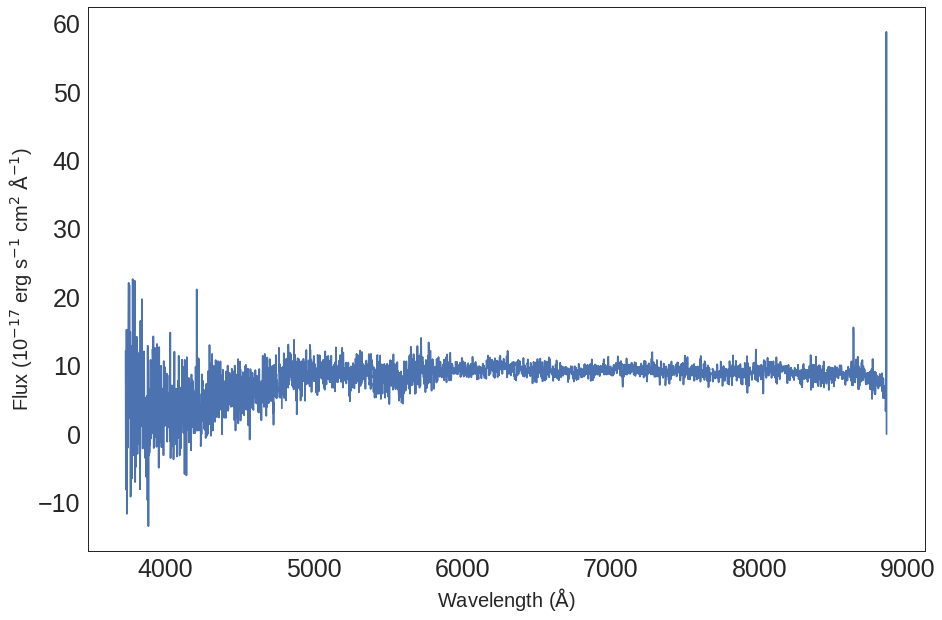

In [102]:
sns.set_style("white")
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"] = 1.
plt.subplots(1,1, figsize=(15,10))
plt.plot(wl,my_flux,'-')
plt.xlabel("Wavelength ($\mathrm{\AA}$)", fontsize=20)
plt.ylabel("Flux (10$^{-17}$ erg s$^{-1}$ cm$^2$ $\mathrm{\AA^{-1}}$)", fontsize=20)
plt.tick_params('both', labelsize=25)
plt.savefig('./../Figs/%d.png' % cataid)
plt.show()